IMPORT ALL THE REQUIRED LIBRARIES

In [ ]:
#data analysis libraries 
import numpy as np
import pandas as pd

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV


#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

INSERT THE DATA FILES AND RUN THEM

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sampleSubmission.csv')

In [ ]:
train.describe(include='all')

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Class_2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16122
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,NaN
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720,NaN
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [ ]:

missing = train.isnull().sum()
missing.sum()

0

In [ ]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [ ]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [ ]:
print("train shape: ", train.shape, " test.shape: ", test.shape)

train shape:  (61878, 95)  test.shape:  (144368, 94)


VISUALIZE THE DATA

<Axes: xlabel='target', ylabel='count'>

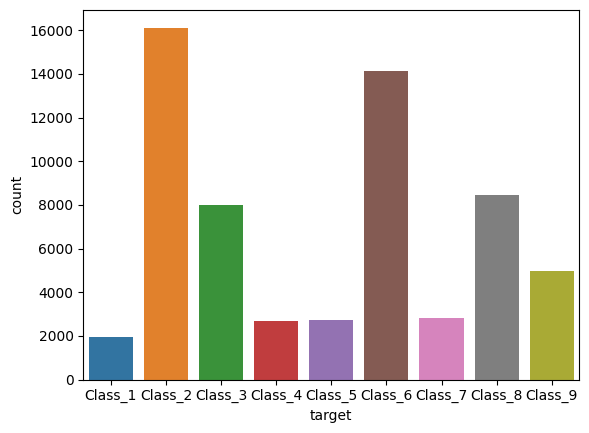

In [ ]:
sns.countplot(x='target', data=train)

In [ ]:
train['target'].value_counts(normalize=True) * 100

Class_2    26.054494
Class_6    22.843337
Class_8    13.678529
Class_3    12.935130
Class_9     8.007693
Class_7     4.588060
Class_5     4.426452
Class_4     4.348880
Class_1     3.117425
Name: target, dtype: float64

START DATA SET TRAINING

In [ ]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']
test = test.drop(['id'], axis=1)

print(X.shape, y.shape, test.shape)

(61878, 93) (61878,) (144368, 93)


In [ ]:
# keeping 20% dataset for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(49502, 93) (49502,) (12376, 93) (12376,)


TESTING DIFFERENT MODELS TO SEE WHAT GIVES THE BEST ACCURACY

In [ ]:
# Random subspaces
clf = tree.DecisionTreeClassifier(criterion='entropy')
subspace_clf = BaggingClassifier(clf, n_estimators=100, max_features=0.6, bootstrap=True, n_jobs=-1)
subspace_clf.fit(X_train, y_train)
predictions = subspace_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8079347123464771

In [ ]:
# keeping 20% dataset for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(49502, 93) (49502,) (12376, 93) (12376,)


In [ ]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.7159825468648998

In [ ]:
# Pasting classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
pasting_clf = BaggingClassifier(clf, n_estimators=100, max_samples=1.0,
                                bootstrap=False, n_jobs=-1)
pasting_clf.fit(X_train, y_train)
predictions = pasting_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.7180833872010343

In [ ]:
# Random patches
clf = tree.DecisionTreeClassifier(criterion='entropy')
subspace_clf = BaggingClassifier(clf, n_estimators=100, max_features=0.5, 
                                 max_samples=0.9, bootstrap=True, n_jobs=-1)
subspace_clf.fit(X_train, y_train)
predictions = subspace_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8021170006464124

In [ ]:
# Bagging classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
bagging_clf = BaggingClassifier(clf, n_estimators=100, max_samples=1.0,
                                bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)
predictions = bagging_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8021170006464124

In [ ]:
#XGBOOST

params = { "n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor' }


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = XGBClassifier(**params)
model.fit(X_train, y_train_encoded)


predictions = model.predict(X_test)


accuracy = accuracy_score(y_test_encoded, predictions)
print( accuracy)

0.8248222365869424


CHOOSING A MODEL TO SUBMIT AND TUNING THEM

In [ ]:
# GridSearch Bagging
hyperparam_grid = {
    'max_samples' : [0.2, 0.3, 0.5, 0.6, 0.8, 1.0]
}

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
bagging_clf = BaggingClassifier(clf, n_estimators=100, bootstrap=True, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.5686813186813187

In [ ]:
grid_search.best_params_

{'max_samples': 0.2}

In [ ]:
# GridSearch Pasting
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
bagging_clf = BaggingClassifier(clf, n_estimators=100, bootstrap=False, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.5696509372979961

In [ ]:
grid_search.best_params_

{'max_samples': 0.2}

In [ ]:
# GridSearch Random Patches
hyperparam_grid = {
    'max_features' : [0.3, 0.5, 0.6, 0.8],
    'max_samples' : [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
}

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
bagging_clf = BaggingClassifier(clf, n_estimators=50, bootstrap=True, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.6426147382029735

In [ ]:
grid_search.best_params_

{'max_features': 0.3, 'max_samples': 0.6}

In [ ]:
# GridSearch Random Subspaces
hyperparam_grid = {
    'max_features' : [0.2, 0.3, 0.5, 0.6, 0.8, 1.0]
}

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
bagging_clf = BaggingClassifier(clf, n_estimators=50, bootstrap=True, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.599224305106658

In [ ]:
grid_search.best_params_

{'max_features': 0.3}

In [98]:
#XGBOOST
param_grid = [{'n_estimators': [50, 100, 150, 200],
                    'max_depth': [2, 4, 6, 8]}]

param_comb = 5
folds = 5
params = {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'}
model = XGBClassifier(**params)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb, n_jobs=-1,
                                   cv=skf.split(X_train, y_train_encoded), verbose=3)

grid_result = random_search.fit(X_train, y_train_encoded)


predictions = random_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.8207013574660633


In [99]:
random_search.best_params_

{'n_estimators': 200, 'max_depth': 6}

SUBMITTING XGBOOST
GAVE THE BEST DATA

In [101]:

y_train_integers = y_train.str.replace('Class_', '').astype(int) - 1

params = {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'}
model = XGBClassifier(max_depth=8, n_estimators=50, **params)
my_model = CalibratedClassifierCV(model, cv=5, method='isotonic')
my_model.fit(X_train, y_train_integers)


predictions = my_model.predict_proba(X_test)


output = pd.DataFrame(predictions, columns=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'])


output.index += 1
output.index.name = 'id'


In [91]:
output.to_csv('results.csv')

In [92]:
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [93]:
output.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.017673,0.296139,0.019390,0.147075,0.243777,0.011387,0.246723,0.013571,0.004266
2,0.022738,0.024378,0.050230,0.003366,0.000000,0.016540,0.876173,0.004689,0.001885
3,0.000045,0.000000,0.000000,0.000000,0.000000,0.999823,0.000081,0.000050,0.000000
4,0.001600,0.003975,0.003052,0.059971,0.000000,0.926997,0.001688,0.000053,0.002663
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
